### Main 1 - Feature = numerical + categorical (with feature engineering)

In [1]:
import pandas as pd

# Load the data
file_path = '/Users/alexandreribeiro/Downloads/df_cleaned.csv'
housing_data_cleaned = pd.read_csv(file_path)

df = housing_data_cleaned.copy()

# Display basic information about the dataset

housing_data_cleaned.info()

# Check for missing values

housing_data_cleaned.isnull().sum()

# Display the first few rows of the dataset

housing_data_cleaned.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4876 entries, 0 to 4875
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   Unnamed: 0                            4876 non-null   int64 
 1   city                                  4876 non-null   object
 2   price                                 4876 non-null   int64 
 3   lot_size_(m2)                         4876 non-null   int64 
 4   living_space_size_(m2)                4876 non-null   int64 
 5   build_year                            4876 non-null   int64 
 6   build_type                            4876 non-null   object
 7   house_type                            4876 non-null   object
 8   house_type_detail                     4876 non-null   object
 9   roof                                  4876 non-null   object
 10  rooms                                 4876 non-null   int64 
 11  toilet                        

,Unnamed: 0,city,price,lot_size_(m2),living_space_size_(m2),build_year,build_type,house_type,house_type_detail,roof,rooms,toilet,bathroom,floors,energy_label,position,garden,estimated_neighbourhood_price_per_m2
0,1,Waddinxveen,425000,181,109,1935,Bestaande bouw,Herenhuis,geschakelde 2-onder-1-kapwoning,Schilddak bedekt met bitumineuze dakbedekking ...,3,1,1,3 woonlagen,E,Aan rustige weg en in woonwijk,Achtertuin en voortuin,1435
1,2,Houten,575000,198,138,1986,Bestaande bouw,Eengezinswoning,2-onder-1-kapwoning,Zadeldak bedekt met pannen,4,1,1,3 woonlagen,B,Aan rustige weg en in woonwijk,Achtertuin,1855
2,3,Pannerden,259500,231,92,1989,Bestaande bouw,Eengezinswoning,2-onder-1-kapwoning,Zadeldak bedekt met pannen,3,2,1,3 woonlagen,B,Aan rustige weg en in woonwijk,"Achtertuin, voortuin en zijtuin",2190
3,4,Sassenheim,1050000,423,210,2000,Bestaande bouw,Eengezinswoning,2-onder-1-kapwoning,Schilddak bedekt met pannen,5,2,2,4 woonlagen en een kelder,A,"Aan rustige weg, aan water, beschutte ligging,...","Achtertuin, voortuin en zijtuin",1340
4,5,Oudewater,445000,127,126,2016,Bestaande bouw,Eengezinswoning,tussenwoning,Dwarskap bedekt met pannen,4,1,1,3 woonlagen,A,In woonwijk,Achtertuin en voortuin,1745


#### Visualize the data (EDA)

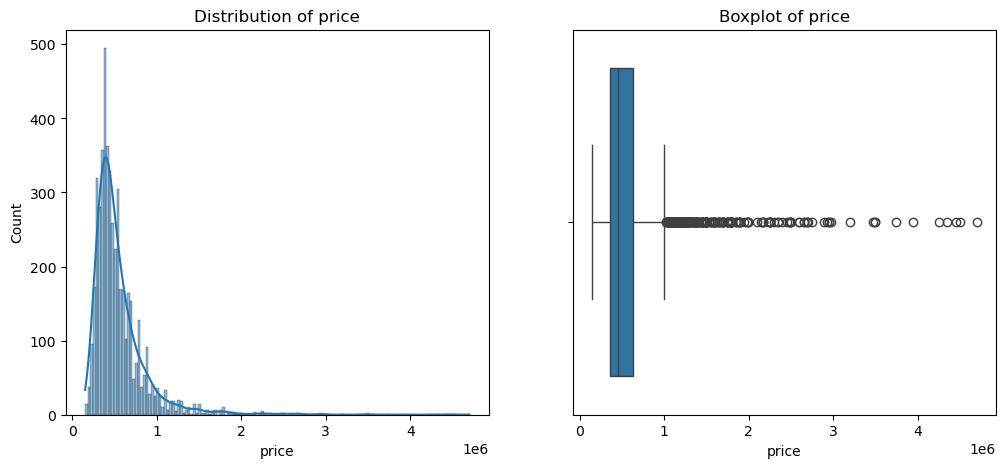

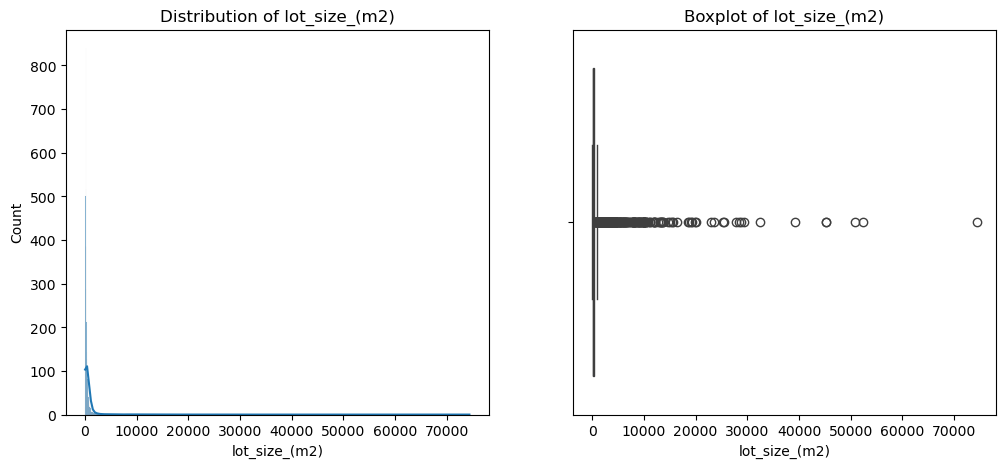

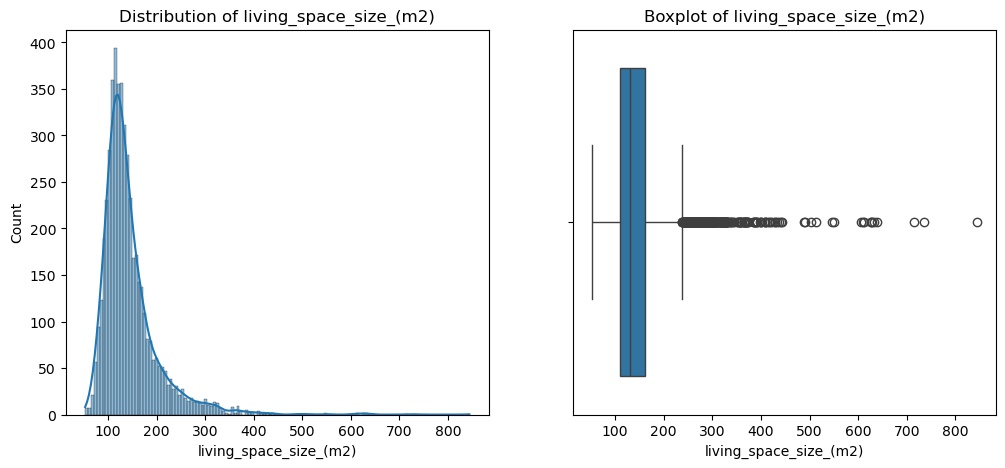

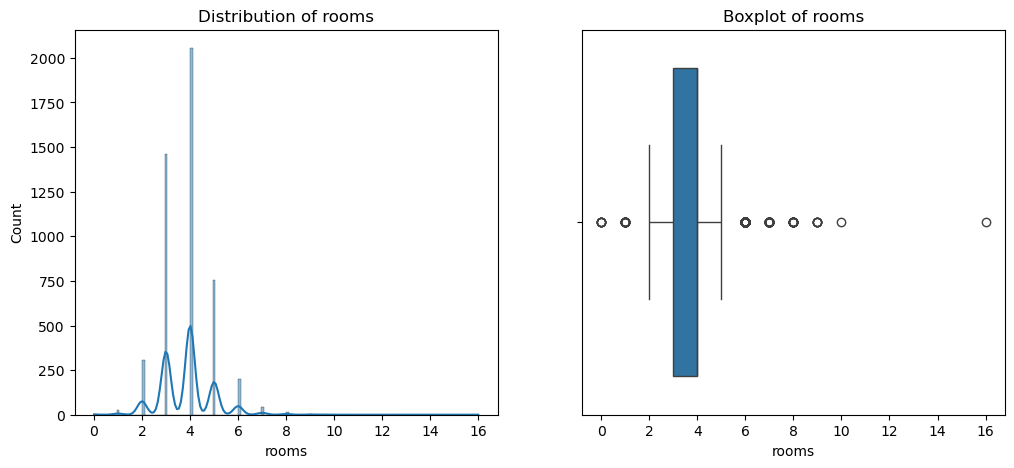

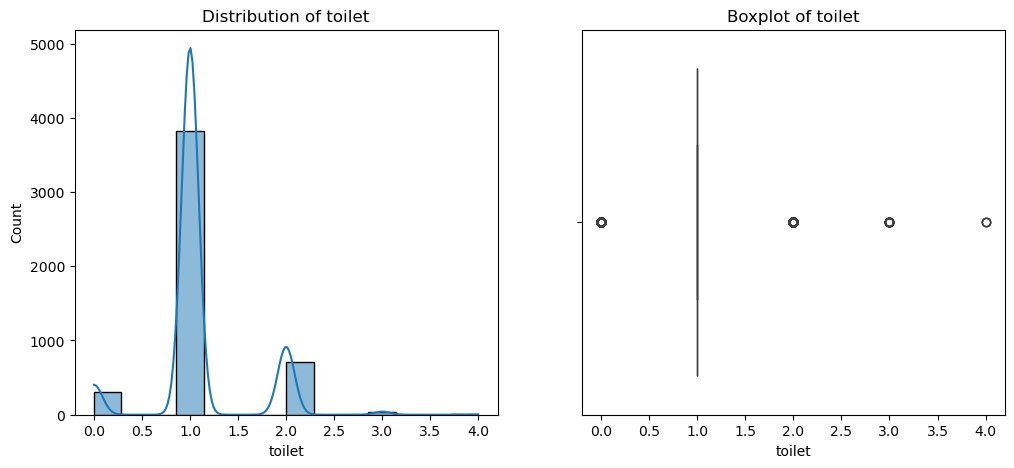

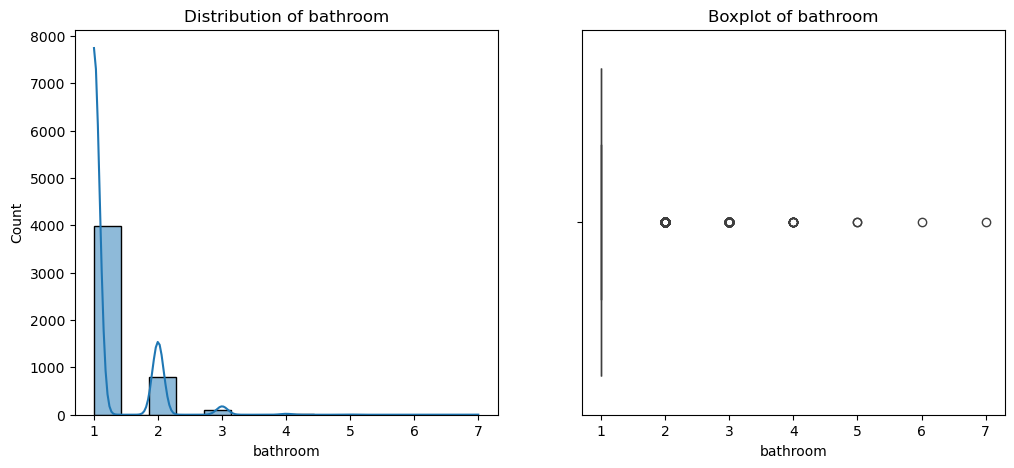

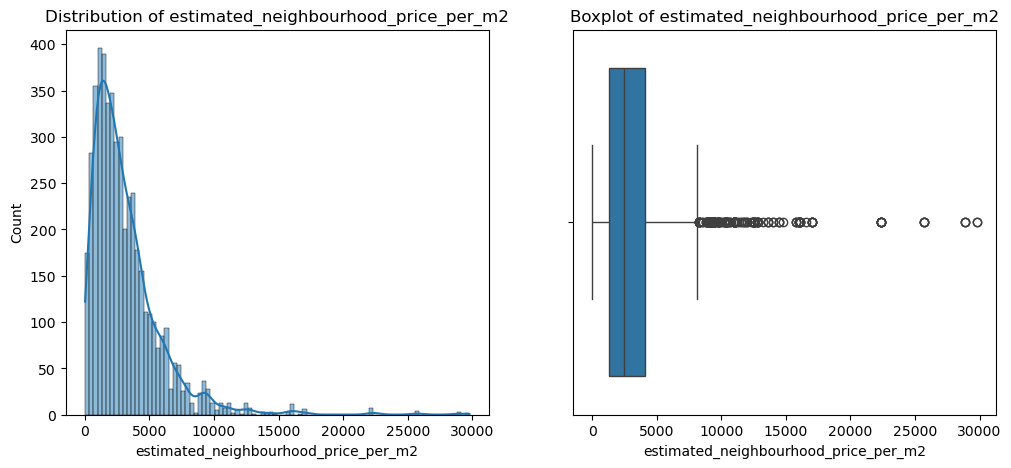

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Function to plot distributions and boxplots
def plot_distributions(df, columns):
    for column in columns:
        fig, ax = plt.subplots(1, 2, figsize=(12, 5))
        sns.histplot(df[column], kde=True, ax=ax[0])
        sns.boxplot(x=df[column], ax=ax[1])
        ax[0].set_title(f'Distribution of {column}')
        ax[1].set_title(f'Boxplot of {column}')
        plt.show()

# List of numerical columns
numerical_columns = ['price', 'lot_size_(m2)', 'living_space_size_(m2)', 'rooms', 'toilet', 'bathroom', 'estimated_neighbourhood_price_per_m2']
plot_distributions(df, numerical_columns)

#### Outliers detection summary 

- price: 307 outliers
- lot_size_(m2): 529 outliers
- living_space_size_(m2): 323 outliers
- rooms: 298 outliers
- toilet: 1054 outliers
- bathroom: 896 outliers
- estimated_neighbourhood_price_per_m2: 219 outliers

#### Approaching the outliers

- Removing outliers: Suitable when outliers are errors or not relevant to the analysis.

IQR Method

The Interquartile Range (IQR) method is suitable when you want to remove outliers based on their relative position within the dataset. It is robust to skewed data and extreme values.

Z-score Method

The Z-score method standardizes data points based on their distance from the mean, in terms of standard deviations. It works well when data is normally distributed.


In [3]:
def detect_outliers_iqr(df, columns):
    outliers = {}
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers[column] = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Detect outliers using IQR method
outliers_iqr = detect_outliers_iqr(df, numerical_columns)

# Display number of outliers in each numerical column
outliers_iqr_summary = {column: len(outliers_iqr[column]) for column in outliers_iqr.keys()}
outliers_iqr_summary

{'price': 307,
 'lot_size_(m2)': 529,
 'living_space_size_(m2)': 323,
 'rooms': 298,
 'toilet': 1054,
 'bathroom': 896,
 'estimated_neighbourhood_price_per_m2': 219}

In [4]:
from scipy import stats

def detect_outliers_zscore(df, columns, threshold=3):
    outliers = {}
    for column in columns:
        z_scores = stats.zscore(df[column])
        outliers[column] = df[(z_scores > threshold) | (z_scores < -threshold)]
    return outliers

# Detect outliers using Z-score method
outliers_zscore = detect_outliers_zscore(df, numerical_columns)

# Display number of outliers in each numerical column
outliers_zscore_summary = {column: len(outliers_zscore[column]) for column in outliers_zscore.keys()}
outliers_zscore_summary

{'price': 87,
 'lot_size_(m2)': 67,
 'living_space_size_(m2)': 85,
 'rooms': 73,
 'toilet': 35,
 'bathroom': 105,
 'estimated_neighbourhood_price_per_m2': 74}

#### Observations:

- The IQR method detects significantly more outliers compared to the Z-score method.
- The Z-score method is less aggressive and might be more suitable if we want to retain more data.

The threshold of 3 in the Z-score method is based on the empirical rule for normal distributions. According to this rule:

- About 68% of the data falls within 1 standard deviation of the mean.
- About 95% of the data falls within 2 standard deviations of the mean.
- About 99.7% of the data falls within 3 standard deviations of the mean.

Using a threshold of 3 means we are identifying outliers as data points that are more than 3 standard deviations away from the mean, which captures about 99.7% of the data and considers the remaining 0.3% as outliers.

#### Decision:

- Since the Z-score method detects fewer outliers, it might be a better approach to avoid losing too many data points.

In [5]:
def remove_outliers_zscore(df, columns, threshold=3):
    for column in columns:
        z_scores = stats.zscore(df[column])
        df = df[(z_scores < threshold) & (z_scores > -threshold)]
    return df

# Remove outliers using Z-score method

df_cleaned_zscore = remove_outliers_zscore(df.copy(), numerical_columns)

# Display basic info of the cleaned dataset

df_cleaned_zscore_info = df_cleaned_zscore.info()
df_cleaned_zscore_description = df_cleaned_zscore.describe(include='all')

df_cleaned_zscore_info, df_cleaned_zscore_description

<class 'pandas.core.frame.DataFrame'>
Index: 4470 entries, 0 to 4875
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   Unnamed: 0                            4470 non-null   int64 
 1   city                                  4470 non-null   object
 2   price                                 4470 non-null   int64 
 3   lot_size_(m2)                         4470 non-null   int64 
 4   living_space_size_(m2)                4470 non-null   int64 
 5   build_year                            4470 non-null   int64 
 6   build_type                            4470 non-null   object
 7   house_type                            4470 non-null   object
 8   house_type_detail                     4470 non-null   object
 9   roof                                  4470 non-null   object
 10  rooms                                 4470 non-null   int64 
 11  toilet                             

(None,
          Unnamed: 0       city         price  lot_size_(m2)  \
 count   4470.000000       4470  4.470000e+03    4470.000000   
 unique          NaN        929           NaN            NaN   
 top             NaN  Eindhoven           NaN            NaN   
 freq            NaN         89           NaN            NaN   
 mean    2696.577181        NaN  4.988711e+05     373.731544   
 std     1584.680341        NaN  2.137777e+05     538.870598   
 min        1.000000        NaN  1.500000e+05      30.000000   
 25%     1331.750000        NaN  3.500000e+05     149.000000   
 50%     2653.500000        NaN  4.500000e+05     224.000000   
 75%     4042.250000        NaN  5.950000e+05     379.750000   
 max     5554.000000        NaN  1.600000e+06    6373.000000   
 
         living_space_size_(m2)   build_year      build_type       house_type  \
 count              4470.000000  4470.000000            4470             4470   
 unique                     NaN          NaN               2 

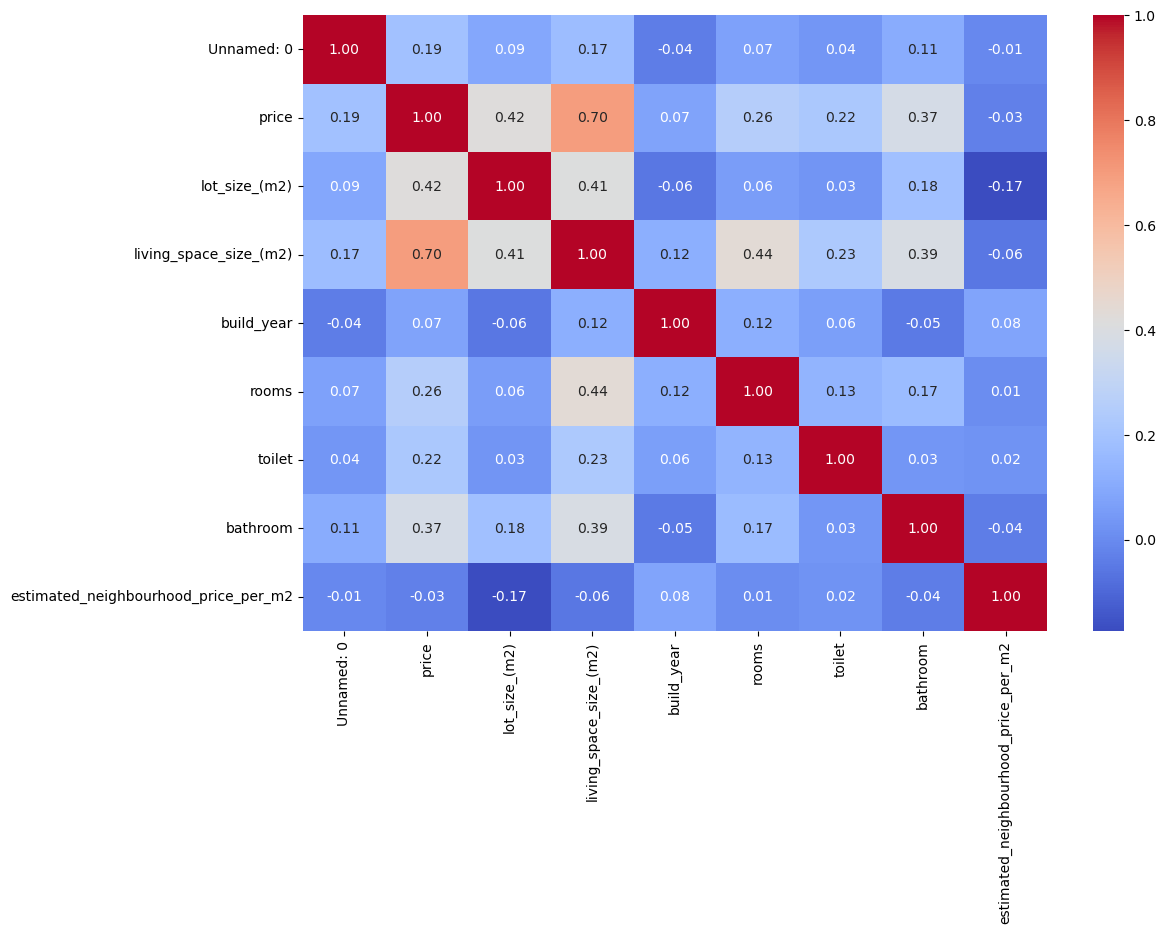

price                                   1.000000
living_space_size_(m2)                  0.695768
lot_size_(m2)                           0.419080
bathroom                                0.374920
rooms                                   0.256162
toilet                                  0.223322
Unnamed: 0                              0.191324
build_year                              0.074305
estimated_neighbourhood_price_per_m2   -0.029254
Name: price, dtype: float64


In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numerical columns for correlation matrix

numerical_columns = df_cleaned_zscore.select_dtypes(include=['float64', 'int64']).columns

# Calculate the correlation matrix for numerical columns

corr_matrix = df_cleaned_zscore[numerical_columns].corr()

# Visualize the correlation matrix using a heatmap

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.show()

# Extracting the correlation of features with the target variable (price)

corr_with_target = corr_matrix['price'].sort_values(ascending=False)
print(corr_with_target)

Based on the correlation matrix, we can observe the following:

Strong Correlations with Price:

- living_space_size_(m2) has a high positive correlation with price (0.70).
- lot_size_(m2) also has a positive correlation with price (0.42).

Moderate Correlations:

- bathroom shows a moderate correlation with living_space_size_(m2) (0.39) and price (0.37).
- rooms has a moderate correlation with living_space_size_(m2) (0.44) and a lower correlation with price (0.26).

### With feature Engineering

#### Prepare Data without Feature Engineering

- Encode Categorical Features: Convert categorical features into numerical values using one-hot encoding.
- Scale Numerical Features: Standardize numerical features.

In [7]:
# Selecting features with high correlation with the target variable

threshold = 0.3
important_features = corr_with_target[abs(corr_with_target) > threshold].index.tolist()
important_features.remove('price')  # Remove the target variable from the list

print("Selected Important Features:", important_features)

Selected Important Features: ['living_space_size_(m2)', 'lot_size_(m2)', 'bathroom']


In [8]:
from sklearn.preprocessing import StandardScaler

# Encode categorical variables

X = df_cleaned_zscore.drop(columns=['price'])
y = df_cleaned_zscore['price']
X_encoded = pd.get_dummies(X, drop_first=True)

# Scale numerical features

scaler = StandardScaler()
X_encoded_scaled = X_encoded.copy()
X_encoded_scaled[important_features] = scaler.fit_transform(X_encoded_scaled[important_features])

# Display the first few rows of the scaled features

X_encoded_scaled.head()

,Unnamed: 0,lot_size_(m2),living_space_size_(m2),build_year,rooms,toilet,bathroom,estimated_neighbourhood_price_per_m2,city_'s-Graveland,city_'s-Gravendeel,...,garden_Tuin rondom,garden_Tuin rondom en voortuin,garden_Tuin rondom en zijtuin,garden_Tuin rondom en zonneterras,garden_Voortuin,garden_Voortuin en zijtuin,garden_Voortuin en zonneterras,"garden_Voortuin, zijtuin en zonneterras",garden_Zijtuin,garden_Zonneterras
0,1,-0.357698,-0.665509,1935,3,1,-0.409526,1435,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2,-0.326147,0.077858,1986,4,1,-0.409526,1855,False,False,...,False,False,False,False,False,False,False,False,False,False
2,3,-0.264901,-1.101276,1989,3,2,-0.409526,2190,False,False,...,False,False,False,False,False,False,False,False,False,False
3,4,0.091439,1.923458,2000,5,2,2.441847,1340,False,False,...,False,False,False,False,False,False,False,False,False,False
4,5,-0.457919,-0.229742,2016,4,1,-0.409526,1745,False,False,...,False,False,False,False,False,False,False,False,False,False


#### Feature Importance Analysis

- Train a Random Forest model to determine feature importance.

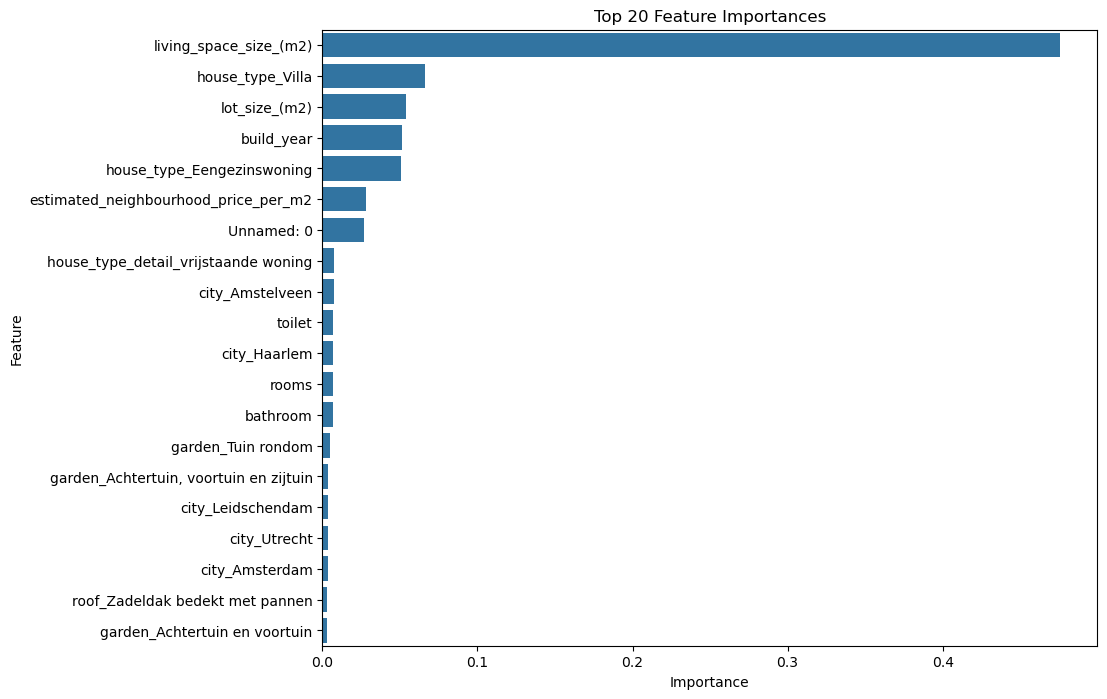

Selected Important Features:
 ['living_space_size_(m2)', 'house_type_Villa', 'lot_size_(m2)', 'build_year', 'house_type_Eengezinswoning', 'estimated_neighbourhood_price_per_m2', 'Unnamed: 0', 'house_type_detail_vrijstaande woning', 'city_Amstelveen', 'toilet', 'city_Haarlem', 'rooms', 'bathroom', 'garden_Tuin rondom', 'garden_Achtertuin, voortuin en zijtuin', 'city_Leidschendam', 'city_Utrecht', 'city_Amsterdam', 'roof_Zadeldak bedekt met pannen', 'garden_Achtertuin en voortuin']


In [9]:
from sklearn.ensemble import RandomForestRegressor

# Define and train the model

rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_encoded, y)

# Extract feature importance

feature_importances = rf_model.feature_importances_

# Create a DataFrame for feature importance

features = X_encoded.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

# Sort by importance

importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Visualize the top 20 features

plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(20))
plt.title('Top 20 Feature Importances')
plt.show()

# Display the most important features

important_features = importance_df.head(20)['Feature'].tolist()
print("Selected Important Features:\n", important_features)

##### Including Dummy Variables in the Model

- When including one-hot encoded (dummy) variables in the model, it is important to include all dummy variables for a categorical feature to maintain the consistency of the feature space. However, you can reduce the number of dummy variables by combining less frequent categories into an “Other” category before encoding.

#### Data preparation for model training

In [10]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
import pandas as pd

# Assume previous steps are executed and we have the necessary data prepared
# df_cleaned_zscore, important_features

# Encode categorical variables
X = df_cleaned_zscore.drop(columns=['price'])
y = df_cleaned_zscore['price']
X_encoded = pd.get_dummies(X, drop_first=True)

# Select only the important features
important_features = [
    'living_space_size_(m2)', 'lot_size_(m2)', 'build_year',
    'estimated_neighbourhood_price_per_m2', 'toilet', 'rooms', 'bathroom',
    'house_type_Villa', 'house_type_Eengezinswoning', 'house_type_detail_vrijstaande woning',
    'city_Amstelveen', 'city_Haarlem', 'city_Leidschendam', 'city_Utrecht',
    'city_Amsterdam', 'roof_Zadeldak bedekt met pannen', 'garden_Tuin rondom',
    'garden_Achtertuin, voortuin en zijtuin', 'garden_Achtertuin en voortuin'
]

X_important = X_encoded[important_features]

# Scale numerical features
scaler = StandardScaler()
numerical_features = ['living_space_size_(m2)', 'lot_size_(m2)', 'build_year', 'estimated_neighbourhood_price_per_m2', 'toilet', 'rooms', 'bathroom']
X_important[numerical_features] = scaler.fit_transform(X_important[numerical_features])

# Split the data without feature engineering
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X_important, y, test_size=0.2, random_state=42)

# Feature Engineering: Polynomial Features
important_numerical_features = [feature for feature in important_features if feature in numerical_features]
X_reduced = X_important[important_numerical_features]

poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly_reduced = poly.fit_transform(X_reduced)
X_poly_reduced_scaled = scaler.fit_transform(X_poly_reduced)

X_poly_reduced_df = pd.DataFrame(X_poly_reduced_scaled, columns=poly.get_feature_names_out(important_numerical_features))
important_categorical_features = [feature for feature in important_features if feature not in numerical_features]
non_numerical_features = X_important[important_categorical_features]
X_combined = pd.concat([non_numerical_features.reset_index(drop=True), X_poly_reduced_df.reset_index(drop=True)], axis=1)

# Split the data with feature engineering
X_poly_train_reduced_scaled, X_poly_test_reduced_scaled, y_poly_train, y_poly_test = train_test_split(X_combined, y, test_size=0.2, random_state=42)

/var/folders/9x/21kgbkbn0gx6fdwpv8lnjmnh0000gn/T/ipykernel_17708/946135671.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_important[numerical_features] = scaler.fit_transform(X_important[numerical_features])


In [11]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
import pandas as pd
from sklearn.metrics import r2_score

# Define and train the models
models = {
    'KNN': KNeighborsRegressor(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Ada Boosting': AdaBoostRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42)
}

# Function to train and evaluate models based on r2 score


def train_and_evaluate(models, X_train, X_test, y_train, y_test):
    results = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        mse = r2_score(y_test, y_pred)
        results[name] = mse
    return results

# Train and evaluate models without feature engineering
results_no_fe = train_and_evaluate(models, X_train_scaled, X_test_scaled, y_train, y_test)

# Train and evaluate models with feature engineering
results_fe = train_and_evaluate(models, X_poly_train_reduced_scaled, X_poly_test_reduced_scaled, y_poly_train, y_poly_test)

# Create a DataFrame to compare results
results_df2 = pd.DataFrame({
    'Without Feature Engineering': results_no_fe,
    'With Feature Engineering': results_fe
})

results_df2

,Without Feature Engineering,With Feature Engineering
KNN,0.485890,0.468537
Random Forest,0.605781,0.602324
Ada Boosting,0.440846,0.394160
Gradient Boosting,0.635188,0.626987


In [12]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
import pandas as pd
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

# Define and train the models
models = {
    'KNN': KNeighborsRegressor(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Ada Boosting': AdaBoostRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42)
}

# Function to train and evaluate models based on r2 score


def train_and_evaluate(models, X_train, X_test, y_train, y_test):
    results = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        mse = mean_absolute_error(y_test, y_pred)
        results[name] = mse
    return results

# Train and evaluate models without feature engineering
results_no_fe = train_and_evaluate(models, X_train_scaled, X_test_scaled, y_train, y_test)

# Train and evaluate models with feature engineering
results_fe = train_and_evaluate(models, X_poly_train_reduced_scaled, X_poly_test_reduced_scaled, y_poly_train, y_poly_test)

# Create a DataFrame to compare results
results_df = pd.DataFrame({
    'Without Feature Engineering': results_no_fe,
    'With Feature Engineering': results_fe
})

results_df

,Without Feature Engineering,With Feature Engineering
KNN,103958.556823,107521.796644
Random Forest,91477.745045,93299.456477
Ada Boosting,120199.014087,130555.582679
Gradient Boosting,89319.234039,89569.128185


In [15]:
# Concat both dataframes

results_df = pd.concat([results_df, results_df2], axis=1)

results_df

,Without Feature Engineering,With Feature Engineering,Without Feature Engineering,With Feature Engineering
KNN,103958.556823,107521.796644,0.485890,0.468537
Random Forest,91477.745045,93299.456477,0.605781,0.602324
Ada Boosting,120199.014087,130555.582679,0.440846,0.394160
Gradient Boosting,89319.234039,89569.128185,0.635188,0.626987


In [16]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for Gradient Boosting
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

# Instantiate the model
gb = GradientBoostingRegressor(random_state=42)

# Instantiate the grid search
grid_search = GridSearchCV(estimator=gb, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train_scaled, y_train)

# Best parameters and best score
best_params = grid_search.best_params_
best_score = -grid_search.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best MSE: {best_score}")

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_scaled)
test_mse = mean_squared_error(y_test, y_pred)
print(f"Test MSE: {test_mse}")

Best Parameters: {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 100}
Best MSE: 16283114075.484365
Test MSE: 15268565117.48941
